In [8]:
import PIL
import numpy as np
from PIL import Image
from numpy import asarray
import cv2

data=[]
for i in range(10):
    img = cv2.imread('dataset/%s.jpg' %i)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (threshi, final_img) = cv2.threshold(img_gray, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    data.append(np.array(final_img, dtype=np.float32).flatten())



In [9]:
import torch
from torch.autograd import Variable

In [10]:
x_data = Variable(torch.Tensor([data]))
y_data = Variable(torch.Tensor([data]))
 
class Perceptron(torch.nn.Module):
 
    def __init__(self):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(256, 256)  # One in and one out
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out
 
# our model
our_model = Perceptron()
 
criterion = torch.nn.MSELoss(size_average = False)
optimizer = torch.optim.Adam(our_model.parameters(), lr = 0.001)
 
for epoch in range(1000):
 
    # Forward pass: Compute predicted y by passing
    # x to the model
    pred_y = our_model(x_data)
 
    # Compute and print loss
    loss = criterion(pred_y, y_data)
 
    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))
 


/Users/shivambang/miniforge3/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


epoch 0, loss 676.1221313476562
epoch 1, loss 569.9752197265625
epoch 2, loss 478.0384521484375
epoch 3, loss 401.1408996582031
epoch 4, loss 338.72479248046875
epoch 5, loss 289.4385070800781
epoch 6, loss 251.48211669921875
epoch 7, loss 222.83364868164062
epoch 8, loss 201.48806762695312
epoch 9, loss 185.6648406982422
epoch 10, loss 173.9234619140625
epoch 11, loss 165.15357971191406
epoch 12, loss 158.51409912109375
epoch 13, loss 153.3755645751953
epoch 14, loss 149.28091430664062
epoch 15, loss 145.91221618652344
epoch 16, loss 143.05458068847656
epoch 17, loss 140.56277465820312
epoch 18, loss 138.33892822265625
epoch 19, loss 136.32032775878906
epoch 20, loss 134.4693145751953
epoch 21, loss 132.7625274658203
epoch 22, loss 131.1809539794922
epoch 23, loss 129.705322265625
epoch 24, loss 128.31578063964844
epoch 25, loss 126.9933090209961
epoch 26, loss 125.72103118896484
epoch 27, loss 124.48587036132812
epoch 28, loss 123.27952575683594
epoch 29, loss 122.09667205810547
epoc

In [11]:
p = our_model(Variable(torch.Tensor([data[9]]))).cpu().detach().numpy()
p = p.reshape(16, 16)
p[p <= 0.5] = 0
p[p > 0.5] = 1
p

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,

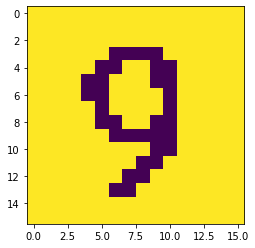

In [12]:
import matplotlib.pyplot as plt
plt.imshow(p)